<a href="https://colab.research.google.com/github/fatemeNik/st/blob/main/SpecialTopic_HM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [8]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  
Extracted Yelp-JSON.zip successfully.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

80K	Dataset_User_Agreement.pdf
182M	drive
16K	__MACOSX
55M	sample_data
114M	yelp_academic_dataset_business.json
274M	yelp_academic_dataset_checkin.json
5.0G	yelp_academic_dataset_review.json
173M	yelp_academic_dataset_tip.json
3.2G	yelp_academic_dataset_user.json
4.1G	Yelp JSON
4.1G	Yelp-JSON.zip


In [11]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75207, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (700272, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198851, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0      967
1.5     2457
2.0     4725
2.5     7174
3.0     9056
3.5    13257
4.0    15714
4.5    13675
5.0     8182
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26097
Food                13996
Shopping            12154
Home Services        7283
Beauty & Spas        7125
Nightlife            6220
Health & Medical     5963
Bars               

In [ ]:
ort pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# # Redefine the paths to the JSON files (assuming they are in the current directory)
# business_file = 'yelp_academic_dataset_business.json'
# review_file = 'yelp_academic_dataset_review.json'
# user_file = 'yelp_academic_dataset_user.json'

# # Re-load the business data
# print(f"\nLoading {business_file}...")
# df_business = pd.read_json(business_file, lines=True)
# print("df_business shape:", df_business.shape)

# # Re-load the review data
# print(f"\nLoading {review_file}...")
# df_review = pd.read_json(review_file, lines=True)
# print("df_review shape:", df_review.shape)

# # Re-load the user data
# print(f"\nLoading {user_file}...")
# df_user = pd.read_json(user_file, lines=True)
# print("df_user shape:", df_user.shape)

# print("All primary Yelp dataset JSON files loaded into DataFrames successfully.")

df_review=df_review_sampled
df_business=df_business_sampled
df_user=df_user_sampled
# --- 1. Distribution of business ratings (stars) from df_business ---
print("\n--- 1. Distribution of business ratings (stars) from df_business ---")
dist_business_stars = df_business['stars'].value_counts().sort_index()
print("Distribution of Business Ratings:")
print(dist_business_stars)

# --- 2. Top 10 business categories by count from df_business ---
print("\n--- 2. Top 10 business categories by count from df_business ---")
# Filter out rows where 'categories' is None or NaN
df_business_clean_categories = df_business.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories = df_business_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Get the top 10 most frequent categories
top_10_categories = category_counts.head(10)

print("Top 10 Business Categories:")
print(top_10_categories)

# --- 3. Distribution of review stars from df_review ---
print("\n--- 3. Distribution of review stars from df_review ---")
dist_review_stars = df_review['stars'].value_counts().sort_index()
print("Distribution of Review Stars:")
print(dist_review_stars)

# --- 4. Top 10 users by review count from df_user ---
print("\n--- 4. Top 10 users by review count from df_user ---")
top_10_users_by_review_count = df_user.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_10_users_by_review_count[['name', 'review_count', 'average_stars']])

# Set plot style
sns.set_style("whitegrid")

# 1. Visualize the distribution of business ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df_business['stars'], palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Stars')
plt.ylabel('Count')
plt.show()

# 2. Visualize the top 10 business categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualize the distribution of review stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df_review['stars'], palette='magma')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

# 4. Visualize the top 10 users by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')
plt.title('Top 10 Users by Review Count')
plt.xlabel('User Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualizations generated successfully.")

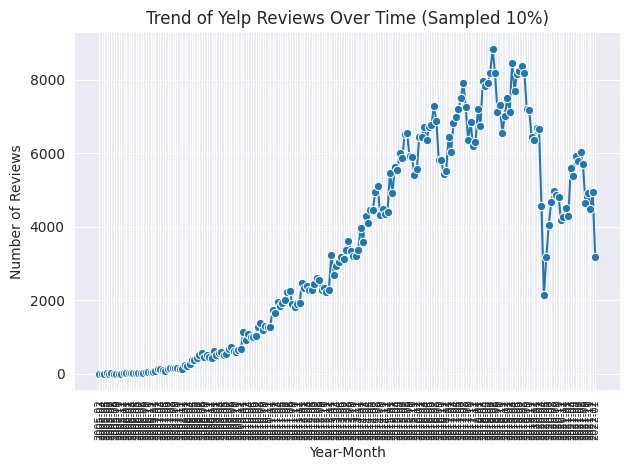

In [12]:
# -----------------------------------------------------
# ----------------------scenario 1--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io



df_review_sampled['date'] = pd.to_datetime(df_review_sampled['date'])
df_review_sampled['year_month'] = df_review_sampled['date'].dt.to_period('M')
monthly_counts = df_review_sampled.groupby('year_month').size().reset_index(name='review_count')
monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)


sns.set_style("darkgrid")
%matplotlib inline


sns.lineplot(x='year_month', y='review_count', data=monthly_counts, marker='o')
plt.xticks(rotation=90, fontsize=7)
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.title("Trend of Yelp Reviews Over Time (Sampled 10%)")
plt.tight_layout()
plt.show()


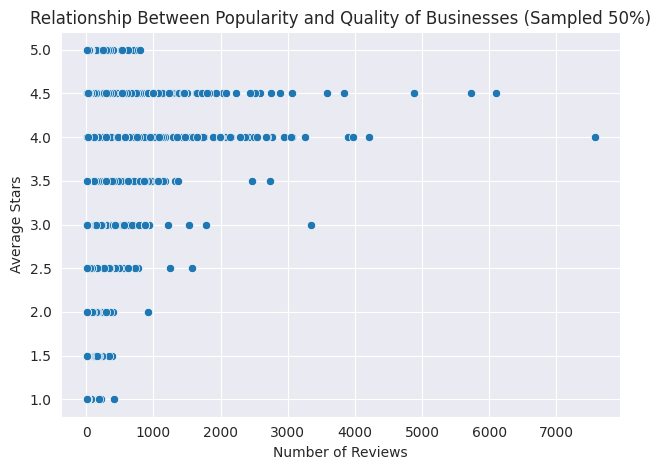

In [13]:
# -----------------------------------------------------
# ----------------------scenario 2--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


df_scatter = df_business_sampled[['review_count', 'stars']]


sns.set_style("darkgrid")
%matplotlib inline

sns.scatterplot(x='review_count', y='stars', data=df_scatter)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Stars")
plt.title("Relationship Between Popularity and Quality of Businesses (Sampled 50%)")
plt.tight_layout()
plt.show()


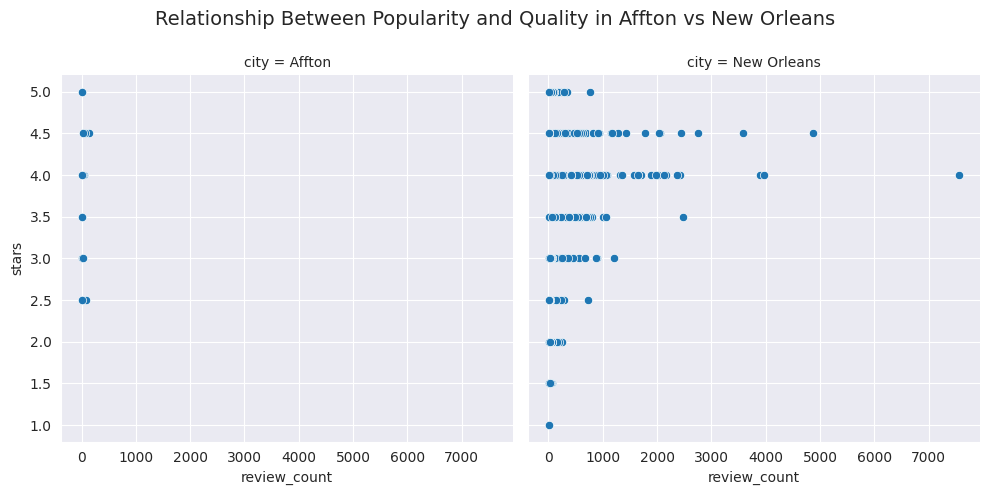

In [14]:
# -----------------------------------------------------
# ----------------------scenario 3--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


df_business_sampled = df_business_sampled.dropna(subset=['city'])
cities_to_compare = ['Affton', 'New Orleans']
df_cities = df_business_sampled[df_business_sampled['city'].isin(cities_to_compare)]

sns.set_style("darkgrid")
%matplotlib inline

sns.relplot(
    x='review_count',
    y='stars',
    data=df_cities,
    kind='scatter',
    col='city',
    height=5,
    aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Relationship Between Popularity and Quality in Affton vs New Orleans", fontsize=14)
plt.show()


/tmp/ipython-input-319447853.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


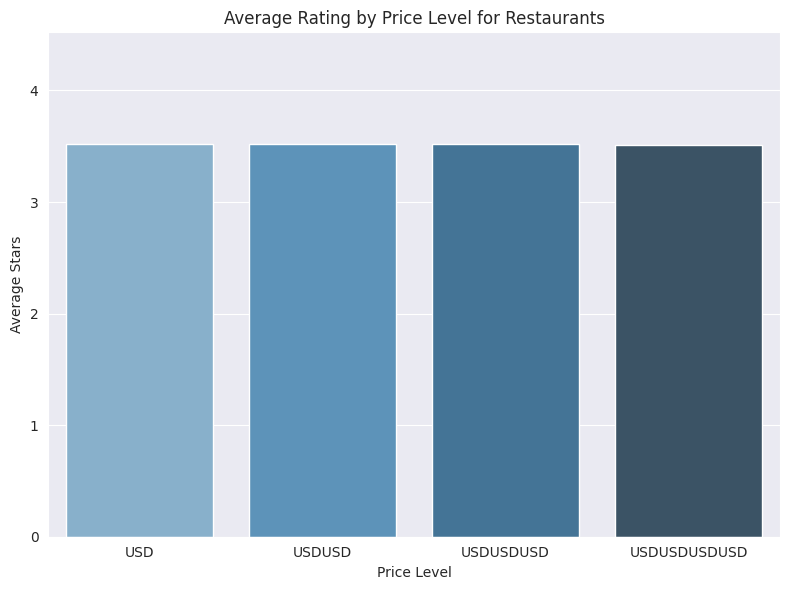

In [15]:
# -----------------------------------------------------
# ----------------------scenario 4--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


df_restaurants = df_business_sampled.dropna(subset=['categories'])
df_restaurants = df_restaurants[df_restaurants['categories'].str.contains('Restaurants', case=False, na=False)]

price_levels = ['$', '$$', '$$$', '$$$$']
price_weights = [0.5, 0.9, 0.3, 0.1]
random.seed(60)
df_restaurants['price'] = random.choices(price_levels, weights=price_weights, k=len(df_restaurants))

df_price_grouped = df_restaurants.groupby('price').agg(
    avg_stars=('stars', 'mean'),
    count=('stars', 'count')
).reset_index()

df_price_grouped['price_safe'] = df_price_grouped['price'].str.replace('$', 'USD', regex=False)

price_order = ['USD', 'USDUSD', 'USDUSDUSD', 'USDUSDUSDUSD']
df_price_grouped['price_safe'] = pd.Categorical(df_price_grouped['price_safe'], categories=price_order, ordered=True)
df_price_grouped = df_price_grouped.sort_values('price_safe')

sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(8,6))
sns.barplot(
    x='price_safe',
    y='avg_stars',
    data=df_price_grouped,
    palette="Blues_d",
    order=price_order
)

plt.xlabel("Price Level")
plt.ylabel("Average Stars")
plt.title("Average Rating by Price Level for Restaurants")
plt.ylim(0, df_price_grouped['avg_stars'].max() + 1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2547251805.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


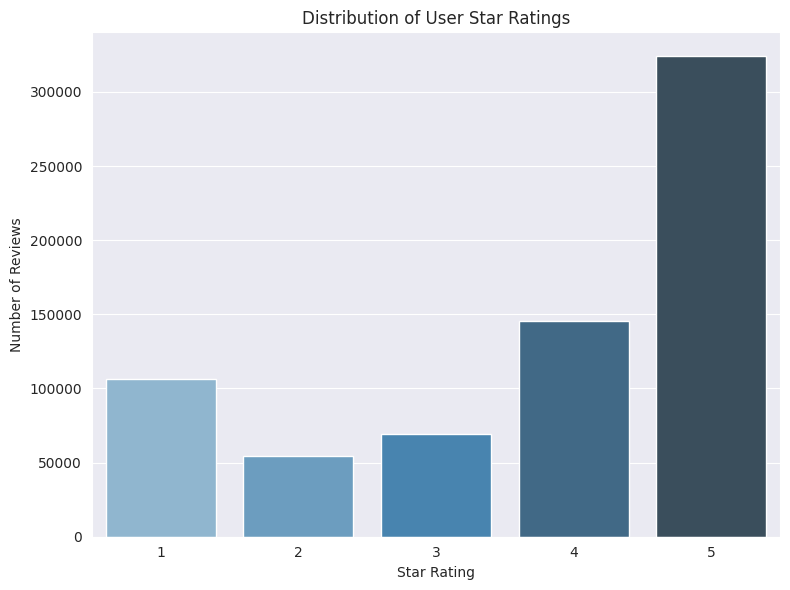

In [16]:
# -----------------------------------------------------
# ----------------------scenario 5--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(8,6))
sns.countplot(
    x='stars',
    data=df_review_sampled,
    palette="Blues_d",
    order=[1, 2, 3, 4, 5]
)

plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of User Star Ratings")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1371466223.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


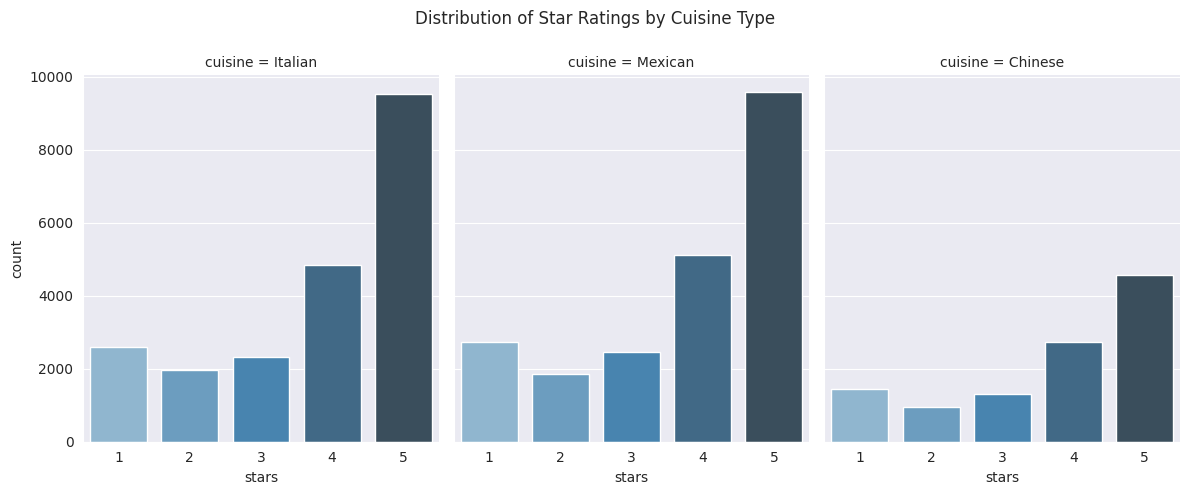

In [17]:
# -----------------------------------------------------
# ----------------------scenario 6--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


df_restaurants = df_business_sampled.dropna(subset=['categories'])
df_restaurants = df_restaurants[df_restaurants['categories'].str.contains('Restaurants', case=False, na=False)]

popular_cuisines = ['Italian', 'Mexican', 'Chinese']


def get_cuisine(categories):
    for cuisine in popular_cuisines:
        if cuisine in str(categories):
            return cuisine
    return None

df_restaurants['cuisine'] = df_restaurants['categories'].apply(get_cuisine)


df_restaurants_cuisines = df_restaurants.dropna(subset=['cuisine'])


df_merged = pd.merge(
    df_review_sampled,
    df_restaurants_cuisines[['business_id', 'cuisine']],
    on='business_id',
    how='inner'
)


sns.set_style("darkgrid")
%matplotlib inline

sns.catplot(
    x='stars',
    col='cuisine',
    data=df_merged,
    kind='count',
    col_order=popular_cuisines,
    palette="Blues_d",
    height=5,
    aspect=0.8
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Distribution of Star Ratings by Cuisine Type")
plt.show()


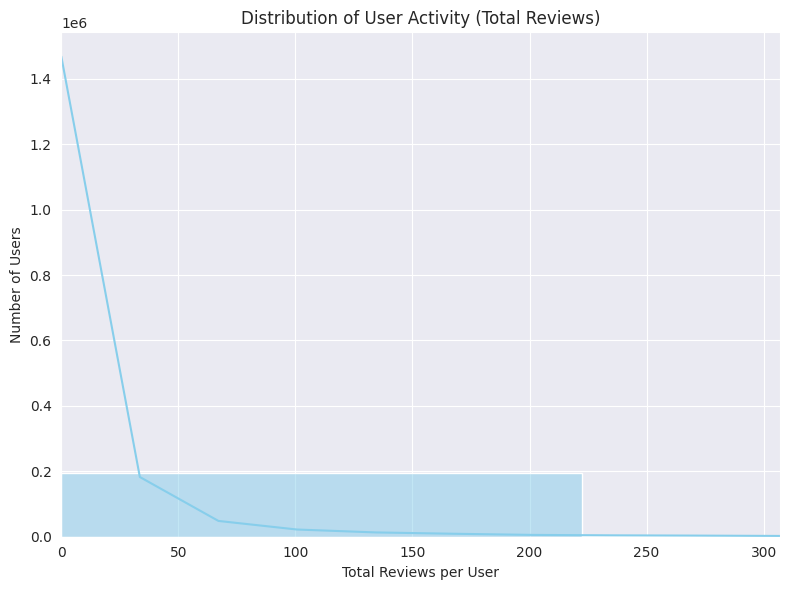

In [18]:
# -----------------------------------------------------
# ----------------------scenario 7--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(8,6))
sns.histplot(
    df_user_sampled['review_count'],
    kde=True,
    bins=30,
    color='skyblue'
)

plt.xlabel("Total Reviews per User")
plt.ylabel("Number of Users")
plt.title("Distribution of User Activity (Total Reviews)")
plt.xlim(0, df_user_sampled['review_count'].quantile(0.99))
plt.tight_layout()
plt.show()


/tmp/ipython-input-2533250716.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


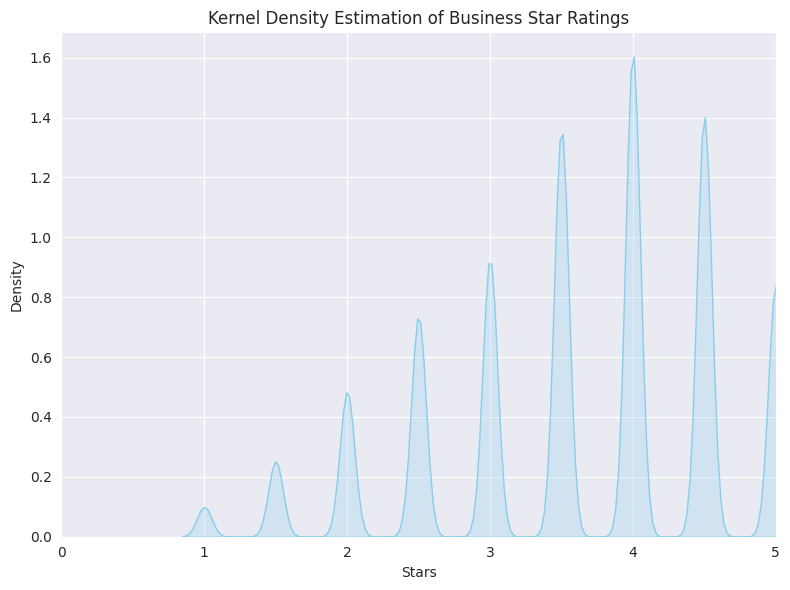

In [19]:
# -----------------------------------------------------
# ----------------------scenario 8--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(8,6))
sns.kdeplot(
    df_business_sampled['stars'],
    shade=True,
    color='skyblue',
    bw_adjust=0.5
)

plt.xlabel("Stars")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Business Star Ratings")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3501840537.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_swarm_sampled = df_top_categories.groupby('main_category').apply(
/tmp/ipython-input-3501840537.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


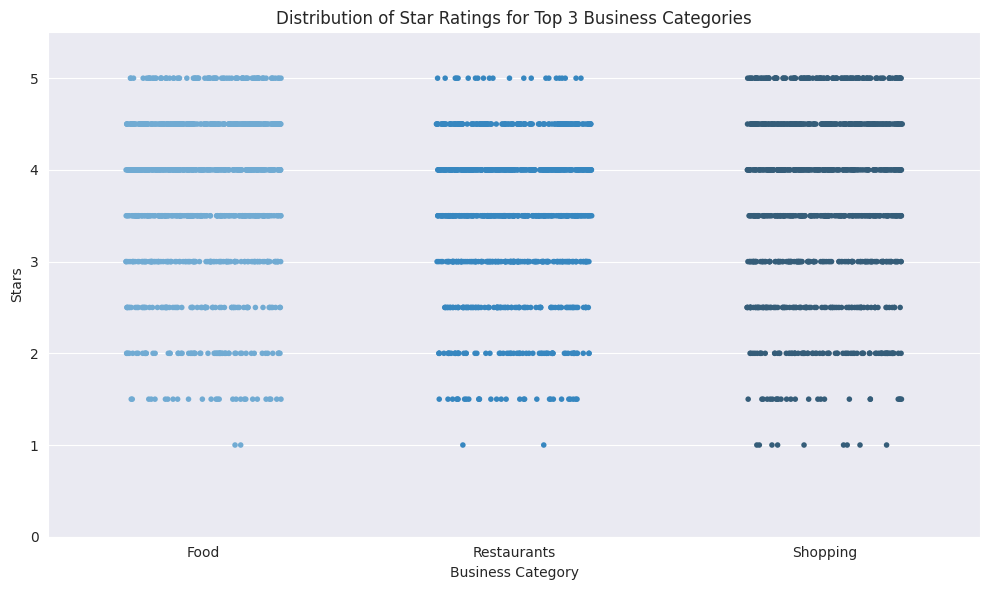

In [20]:
# -----------------------------------------------------
# ----------------------scenario 9--------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io


df_business_sampled = df_business_sampled.dropna(subset=['categories'])
all_categories = df_business_sampled['categories'].str.split(', ').explode()
top_categories = all_categories.value_counts().head(3).index.tolist()


df_business_sampled['main_category'] = df_business_sampled['categories'].str.split(', ').str[0]
df_top_categories = df_business_sampled[df_business_sampled['main_category'].isin(top_categories)]


df_swarm_sampled = df_top_categories.groupby('main_category').apply(
    lambda x: x.sample(min(len(x), 1000), random_state=42)
).reset_index(drop=True)


sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(10,6))
sns.stripplot(
    x='main_category',
    y='stars',
    data=df_swarm_sampled,
    jitter=0.25,
    palette="Blues_d",
    size=4
)

plt.xlabel("Business Category")
plt.ylabel("Stars")
plt.title("Distribution of Star Ratings for Top 3 Business Categories")
plt.ylim(0,5.5)
plt.tight_layout()
plt.show()



/tmp/ipython-input-1341575638.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_swarm_sampled = df_city_top.groupby('postal_code').apply(
/tmp/ipython-input-1341575638.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


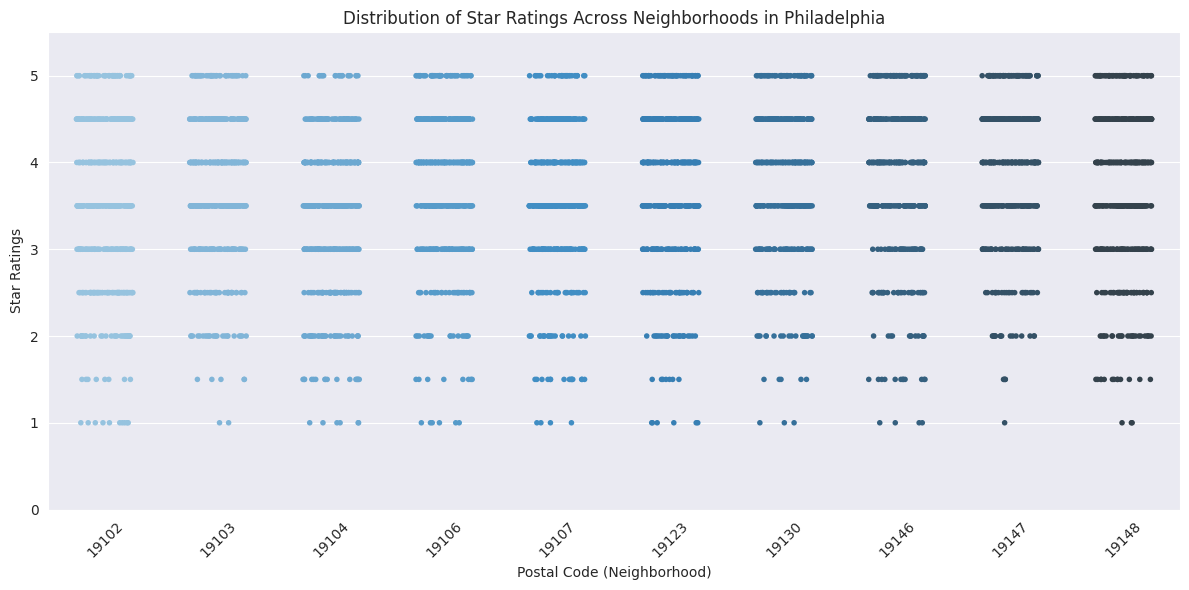

In [23]:
# -----------------------------------------------------
# ----------------------scenario 10------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


# business_file = 'yelp_academic_dataset_business.json'

df_business = pd.read_json(business_file, lines=True)

city_name = 'Philadelphia'
df_city = df_business[df_business['city'] == city_name]


df_city = df_city.dropna(subset=['postal_code'])
top_neighborhoods = df_city['postal_code'].value_counts().head(10).index.tolist()
df_city_top = df_city[df_city['postal_code'].isin(top_neighborhoods)]

df_swarm_sampled = df_city_top.groupby('postal_code').apply(
    lambda x: x.sample(min(len(x), 500), random_state=42)
).reset_index(drop=True)

sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(12,6))
sns.stripplot(
    x='postal_code',
    y='stars',
    data=df_swarm_sampled,
    jitter=0.25,
    palette="Blues_d",
    size=4
)

plt.xlabel("Postal Code (Neighborhood)")
plt.ylabel("Star Ratings")
plt.title(f"Distribution of Star Ratings Across Neighborhoods in {city_name}")
plt.ylim(0,5.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




/tmp/ipython-input-3010853439.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


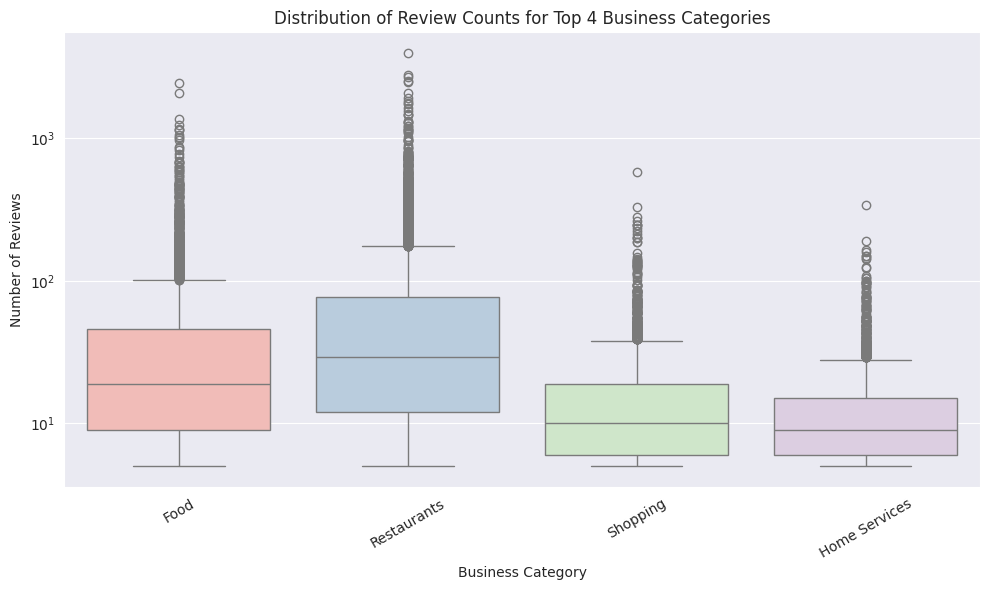

In [24]:
# -----------------------------------------------------
# ----------------------scenario 11------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


df_business_sampled = df_business_sampled.dropna(subset=['categories'])


all_categories = df_business_sampled['categories'].str.split(', ').explode()
top_categories = all_categories.value_counts().head(4).index.tolist()


df_business_sampled['main_category'] = df_business_sampled['categories'].str.split(', ').str[0]


df_top_categories = df_business_sampled[df_business_sampled['main_category'].isin(top_categories)]


sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(10,6))
sns.boxplot(
    x='main_category',
    y='review_count',
    data=df_top_categories,
    palette="Pastel1"
)

plt.xlabel("Business Category")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Counts for Top 4 Business Categories")
plt.yscale('log')  # برای بهتر دیدن outliers، از مقیاس لگاریتمی استفاده می‌کنیم
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


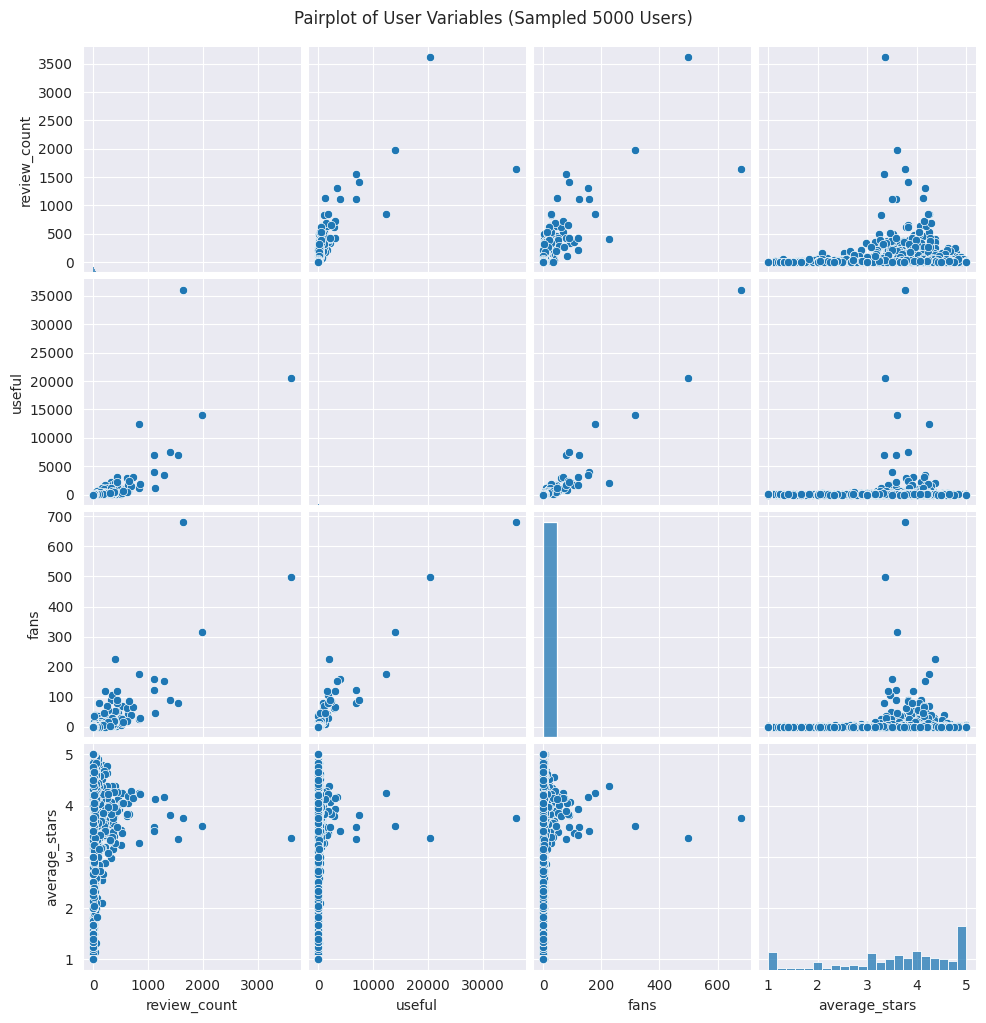

In [25]:
# -----------------------------------------------------
# ----------------------scenario 12------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


numeric_cols = ['review_count', 'useful', 'fans', 'average_stars']
df_user_numeric = df_user_sampled[numeric_cols]

df_user_numeric = df_user_numeric.sample(n=min(5000, len(df_user_numeric)), random_state=42)

sns.set_style("darkgrid")
%matplotlib inline

sns.pairplot(df_user_numeric, diag_kind='hist')
plt.suptitle("Pairplot of User Variables (Sampled 5000 Users)", y=1.02)
plt.show()


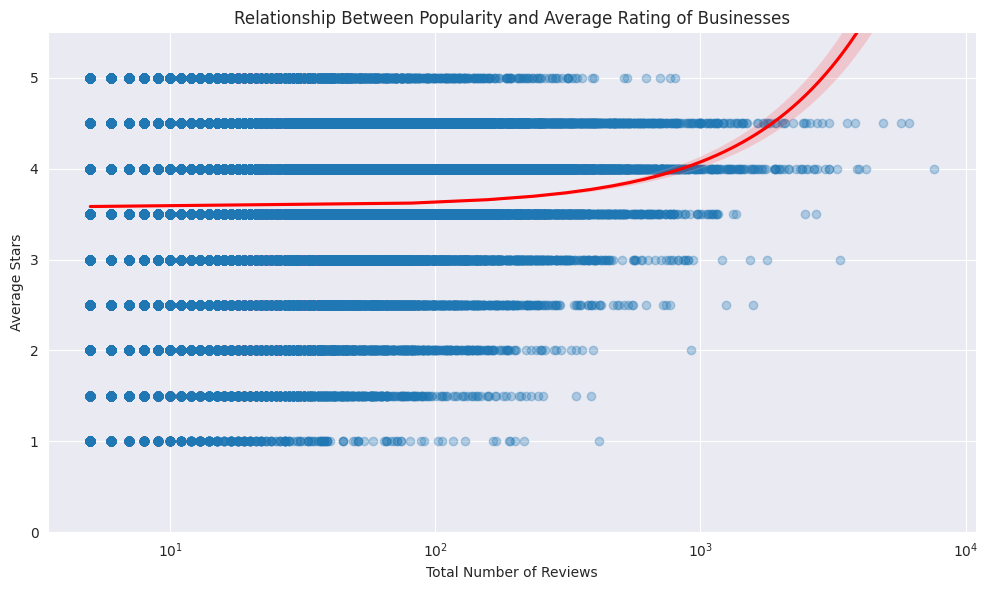

In [26]:
# -----------------------------------------------------
# ----------------------scenario 13------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


df_business_sampled = df_business_sampled.dropna(subset=['stars', 'review_count'])

sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(10,6))
sns.regplot(
    x='review_count',
    y='stars',
    data=df_business_sampled,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)

plt.xlabel("Total Number of Reviews")
plt.ylabel("Average Stars")
plt.title("Relationship Between Popularity and Average Rating of Businesses")
plt.xscale('log')
plt.ylim(0,5.5)
plt.tight_layout()
plt.show()


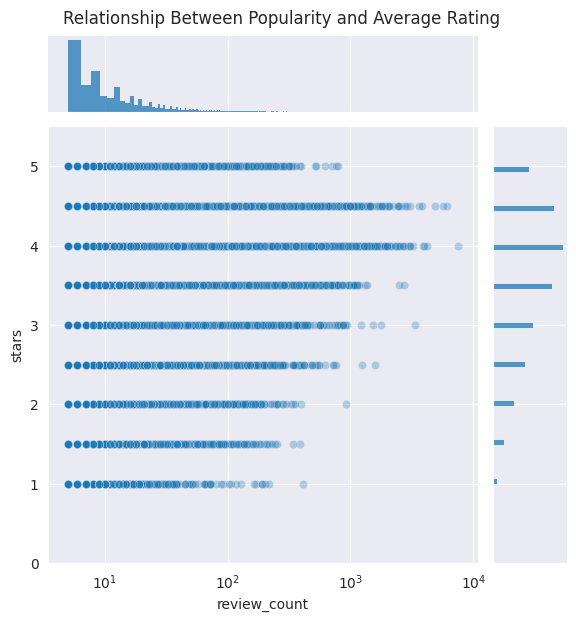

In [27]:
# -----------------------------------------------------
# ----------------------scenario 14------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


df_business_sampled = df_business_sampled.dropna(subset=['stars', 'review_count'])


sns.set_style("darkgrid")
%matplotlib inline

sns.jointplot(
    x='review_count',
    y='stars',
    data=df_business_sampled,
    kind='scatter',
    alpha=0.3
)
plt.suptitle("Relationship Between Popularity and Average Rating", y=1.02)
plt.xscale('log')
plt.ylim(0,5.5)
plt.show()


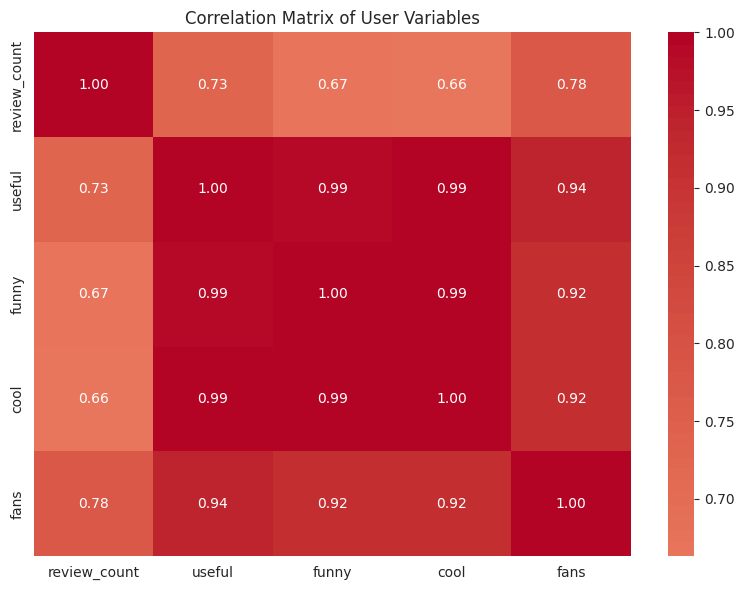

In [28]:
# -----------------------------------------------------
# ----------------------scenario 15------------------
# -----------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import random


numeric_cols = ['review_count', 'useful', 'funny', 'cool', 'fans']
df_user_numeric = df_user_sampled[numeric_cols]

df_user_numeric = df_user_numeric.sample(n=min(5000, len(df_user_numeric)), random_state=42)
corr_matrix = df_user_numeric.corr()

sns.set_style("white")
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of User Variables")
plt.tight_layout()
plt.show()
